In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
test = pd.read_csv('test.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
Safety_Score               2500 non-null float64
Days_Since_Inspection      2500 non-null int64
Total_Safety_Complaints    2500 non-null int64
Control_Metric             2500 non-null float64
Turbulence_In_gforces      2500 non-null float64
Cabin_Temperature          2500 non-null float64
Accident_Type_Code         2500 non-null int64
Max_Elevation              2500 non-null float64
Violations                 2500 non-null int64
Adverse_Weather_Metric     2500 non-null float64
Accident_ID                2500 non-null int64
dtypes: float64(6), int64(5)
memory usage: 215.0 KB


In [7]:
df.isna().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [8]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [9]:
df.dtypes[df.dtypes!=object].index

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

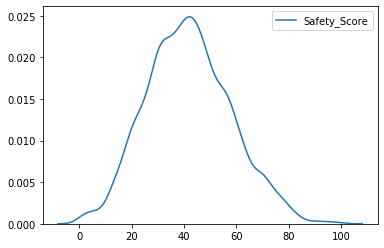

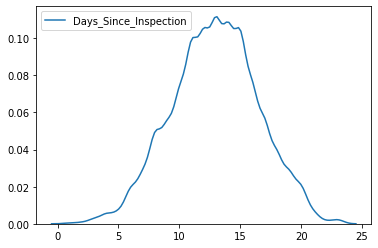

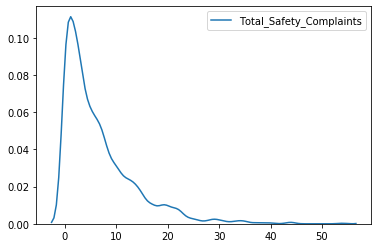

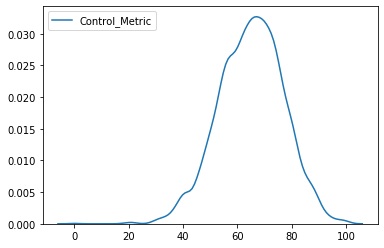

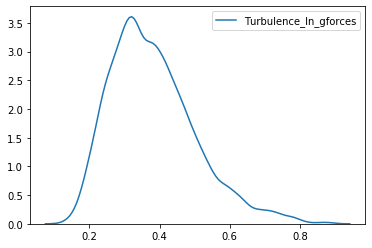

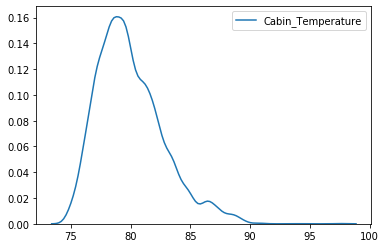

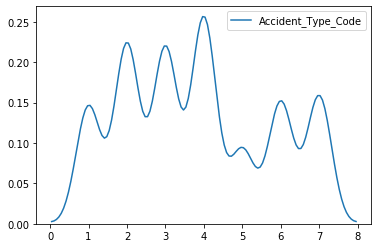

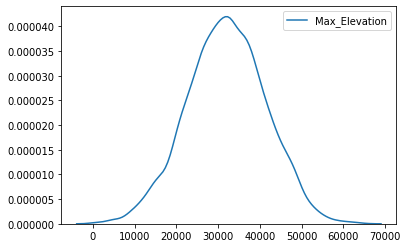

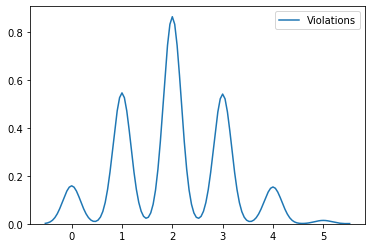

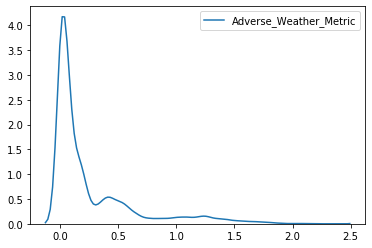

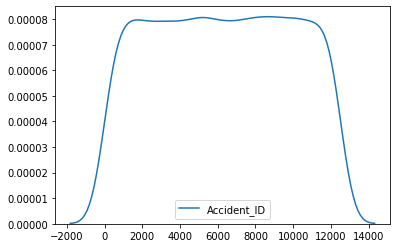

In [10]:
for i in df.dtypes[df.dtypes!=object].index:
    sns.kdeplot(df[i])
    plt.show()

In [11]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [12]:
df[['Accident_Type_Code','Violations']] = df[['Accident_Type_Code','Violations']].astype(object)

In [13]:
test[['Accident_Type_Code','Violations']] = test[['Accident_Type_Code','Violations']].astype(object)

In [14]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code          object
Max_Elevation              float64
Violations                  object
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [15]:
test.dtypes

Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code          object
Max_Elevation              float64
Violations                  object
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

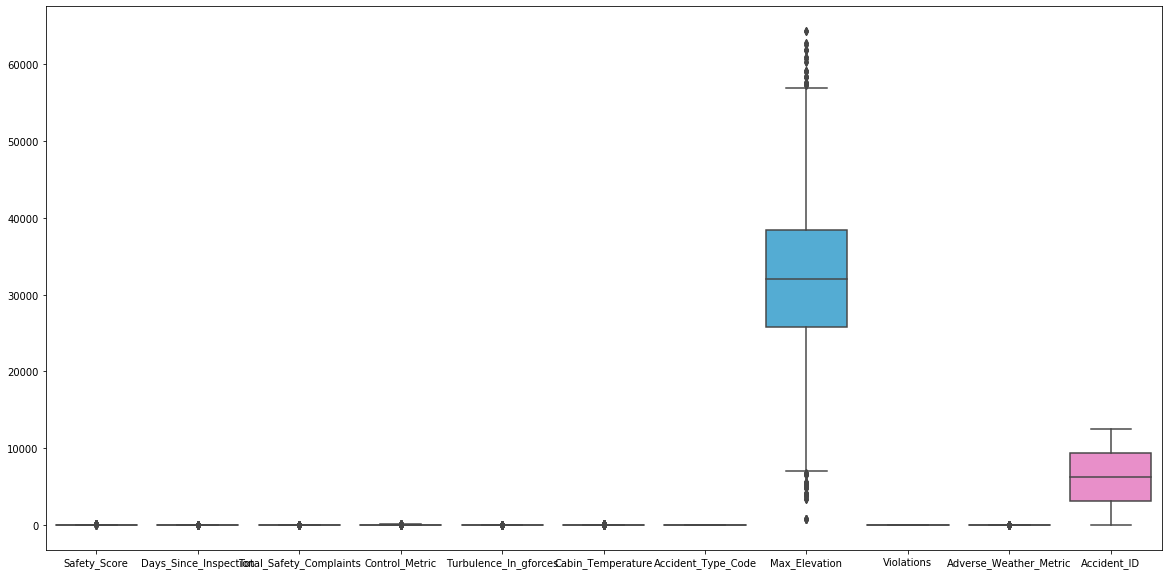

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [17]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df[['Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric']] = standard_scaler.fit_transform(df[['Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric']] )

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
test[['Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric']] = standard_scaler.fit_transform(test[['Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric']] )

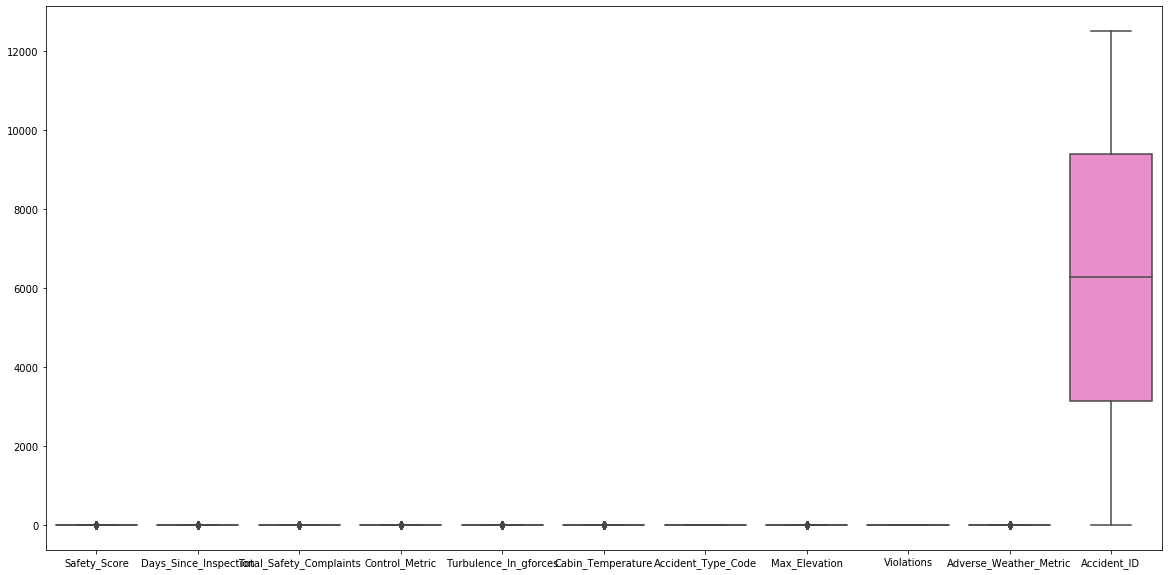

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [20]:
X = df.drop(columns=['Severity','Accident_ID'])
y = df['Severity']


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X,y)

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus



features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.703456 to fit



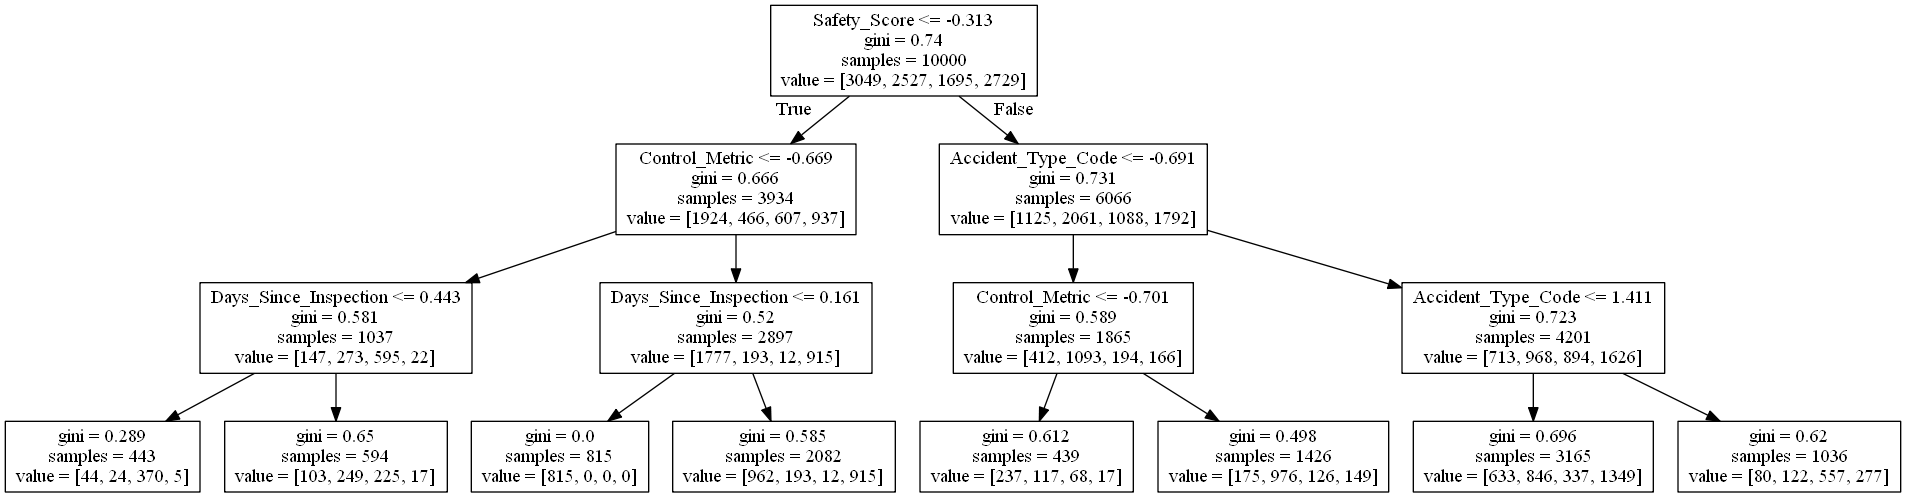

In [21]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=11)
dt.fit(X,y)
features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [22]:
test1 = test.drop(columns=['Accident_ID'])
y_pred = dt.predict(test1)
y_prob = dt.predict_proba(test1)
y_pred_train = dt.predict(X)
y_prob_train = dt.predict_proba(X)

In [23]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

In [24]:
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.5515
F1 score on train 55.24357344030902


#Hyperparameter Tuning--Grid Search

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [26]:
dt = DecisionTreeClassifier()
params  = {'max_depth' : [2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

gsearch_rfc = GridSearchCV(dt,param_grid=params,cv=3)

gsearch_rfc.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [27]:
gsearch_rfc.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [28]:
##For Grid search we consider max_depth between 2 to 8, minimum samples split between 2 to 10
#and min samples leaf between 1 to 10, and we obatined the perfect combination above.

In [29]:
##No we will build decision tree using these hyperparameters

In [30]:
dt = DecisionTreeClassifier(**gsearch_rfc.best_params_)

dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
test1 = test.drop(columns=['Accident_ID'])
y_pred = dt.predict(test1)
y_prob = dt.predict_proba(test1)
y_pred_train = dt.predict(X)
y_prob_train = dt.predict_proba(X)

In [32]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

In [33]:
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.908
F1 score on train 90.838227744867


In [34]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})

In [35]:
data.to_csv('submission.csv')

# ##Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,random_state=1)



In [37]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [38]:
test1 = test.drop(columns=['Accident_ID'])
y_pred = rfc.predict(test1)
y_prob = rfc.predict_proba(test1)
y_pred_train = rfc.predict(X)
y_prob_train = rfc.predict_proba(X)

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

In [40]:
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.9968
F1 score on train 99.67994691096028


In [41]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})

In [42]:
data.to_csv('submission2.csv')

# Hyper parameter tuning of Random Forest

In [43]:
from scipy.stats import randint as sp_randint

rfc= RandomForestClassifier(random_state=1)

params = {'n_estimators':sp_randint(5,25),'criterion':['gini','entropy'],
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,20),'max_features':sp_randint(2,10)}

rand_search_rfc = RandomizedSearchCV(rfc,param_distributions=params,cv=3,random_state=1)

rand_search_rfc.fit(X,y)

print(rand_search_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 10, 'min_samples_split': 19, 'n_estimators': 5}


In [44]:
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X,y)

test1 = test.drop(columns=['Accident_ID'])
y_pred = rfc.predict(test1)
y_prob = rfc.predict_proba(test1)
y_pred_train = rfc.predict(X)
y_prob_train = rfc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.9309
F1 score on train 93.11015183038431


In [45]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})

data.to_csv('submission3.csv')

In [46]:
##KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
test1 = test.drop(columns=['Accident_ID'])
y_pred = knn.predict(test1)
y_prob = knn.predict_proba(test1)
y_pred_train = knn.predict(X)
y_prob_train = knn.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.8254
F1 score on train 82.52322059870772


In [47]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})

data.to_csv('submission5.csv')

In [48]:
##Hyperparameter tuning:


params = {'n_neighbors':sp_randint(1,25),
    'p':sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn,param_distributions=params,cv=3,random_state=1)

rand_search_knn.fit(X,y)

print(rand_search_knn.best_params_)

knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X,y)

test1 = test.drop(columns=['Accident_ID'])
y_pred = knn.predict(test1)
y_prob = knn.predict_proba(test1)
y_pred_train = knn.predict(X)
y_prob_train = knn.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

{'n_neighbors': 13, 'p': 1}
Accuracy of Decision Tree on Train 0.8118
F1 score on train 81.17455009746574


In [49]:
## Hyperparameter tuning using sp_randint

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params = {'n_neighbors':sp_randint(1,25),
    'p':sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn,param_distributions=params,cv=3,random_state=1)

rand_search_knn.fit(X,y)

print(rand_search_knn.best_params_)


##n_neighbors is k and p is the distance(p=1 means Manhattan dist.)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X,y)

test1 = test.drop(columns=['Accident_ID'])
y_pred = knn.predict(test1)
y_prob = knn.predict_proba(test1)
y_pred_train = knn.predict(X)
y_prob_train = knn.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

{'n_neighbors': 13, 'p': 1}
Accuracy of Decision Tree on Train 0.8118
F1 score on train 81.17455009746574


In [50]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})

data.to_csv('submission4.csv')

In [51]:
# Stacking algorithms

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
knn = KNeighborsClassifier(**rand_search_knn.best_params_)


clf = VotingClassifier(estimators=[('lr',lr),('rfc',rfc),('knn',knn)],voting='soft')
clf.fit(X,y)


test1 = test.drop(columns=['Accident_ID'])
y_pred = clf.predict(test1)
y_prob = clf.predict_proba(test1)
y_pred_train = clf.predict(X)
y_prob_train = clf.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Decision Tree on Train 0.9109
F1 score on train 91.1293269630005


In [52]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})

data.to_csv('submission6.csv')

In [53]:
##LGBM:

Accuracy of Decision Tree on Train 0.991
F1 score on train 99.09983191326273


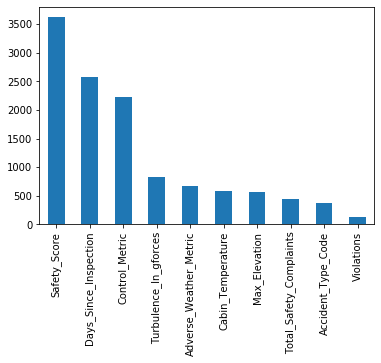

In [54]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()

lgbc.fit(X,y)

test1 = test.drop(columns=['Accident_ID'])
y_pred = lgbc.predict(test1)
y_prob = lgbc.predict_proba(test1)
y_pred_train = lgbc.predict(X)
y_prob_train = lgbc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

cols = X.columns
lgbc.feature_importances_

fi = pd.DataFrame(index=cols,data=lgbc.feature_importances_,columns=['Importance'])
fi

#Feature importance is available for bagging and boosting both

fi['Importance'].sort_values(ascending=False).plot.bar()

In [55]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})

data.to_csv('submission7.csv')

{'max_depth': 11, 'min_child_samples': 18, 'n_estimators': 227, 'num_leaves': 37}
Accuracy of Decision Tree on Train 1.0
F1 score on train 100.0


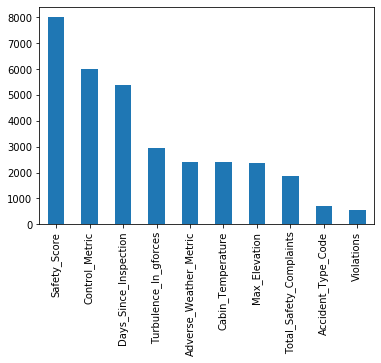

In [56]:
#hyperparameter tuning of LGBM

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

lgbc= lgb.LGBMClassifier(random_state=1)

params = {'n_estimators':sp_randint(5,250),
    'max_depth':sp_randint(2,20),
    'min_child_samples':sp_randint(1,20),'num_leaves':sp_randint(5,50)}

rand_search_lgbc = RandomizedSearchCV(lgbc,param_distributions=params,cv=3,random_state=1)

rand_search_lgbc.fit(X,y)

print(rand_search_lgbc.best_params_)



lgbc= lgb.LGBMClassifier(**rand_search_lgbc.best_params_,random_state=1)

lgbc.fit(X,y)

test1 = test.drop(columns=['Accident_ID'])
y_pred = lgbc.predict(test1)
y_prob = lgbc.predict_proba(test1)
y_pred_train = lgbc.predict(X)
y_prob_train = lgbc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

cols = X.columns
lgbc.feature_importances_

fi = pd.DataFrame(index=cols,data=lgbc.feature_importances_,columns=['Importance'])
fi

#Feature importance is available for bagging and boosting both

fi['Importance'].sort_values(ascending=False).plot.bar()

In [57]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})
data.to_csv('submission8.csv')

In [58]:
##Support Vector Machines

In [59]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',probability=True)

svc.fit(X,y)

test1 = test.drop(columns=['Accident_ID'])
y_pred = svc.predict(test1)
y_prob = svc.predict_proba(test1)
y_pred_train = svc.predict(X)
y_prob_train = svc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.9071
F1 score on train 90.72080475571683


In [60]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})
data.to_csv('submission9.csv')

In [61]:
##Hyperparameter tuning SVM

from sklearn.model_selection import RandomizedSearchCV
svc = SVC(probability=True)

params = {'C':np.logspace(-4,4,10000),'gamma':np.logspace(-4,4,10000)}

rand_search_svc  = RandomizedSearchCV(svc, param_distributions=params, cv=3, random_state=1)


rand_search_svc.fit(X,y)
print(rand_search_svc.best_params_)


svc = SVC(**rand_search_svc.best_params_,probability=True)

svc.fit(X,y)
test1 = test.drop(columns=['Accident_ID'])
y_pred = svc.predict(test1)
y_prob = svc.predict_proba(test1)
y_pred_train = svc.predict(X)
y_prob_train = svc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

{'gamma': 0.0004760666587276529, 'C': 2991.903589222259}
Accuracy of Decision Tree on Train 0.8403
F1 score on train 84.10368167971451


In [62]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})
data.to_csv('submission10.csv')

In [63]:
# Stacking algorithms

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(**gsearch_rfc.best_params_)
lgbc= lgb.LGBMClassifier(**rand_search_lgbc.best_params_)
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
svc = SVC(**rand_search_svc.best_params_,probability=True)


clf = VotingClassifier(estimators=[('dt',dt),('lgbc',lgbc),('rfc',rfc),('svc',svc)],voting='soft')
clf.fit(X,y)


test1 = test.drop(columns=['Accident_ID'])
y_pred = clf.predict(test1)
y_prob = clf.predict_proba(test1)
y_pred_train = clf.predict(X)
y_prob_train = clf.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.9768
F1 score on train 97.68366728488452


In [65]:
data = pd.DataFrame(y_pred,index=test['Accident_ID']).rename(columns={0:'Severity'})
data.to_csv('submission11.csv')